In [ ]:
import os
import cv2
import PIL
import pathlib
import numpy as np
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_size = (50, 50)
batch_size = 64

In [ ]:
from PIL import Image
import numpy as np
import os

X = []
y = []

data_dir = "/content/drive/MyDrive/malaria/cell_images"

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for file in os.listdir(label_dir):
            if file.endswith('.png'):
                img = Image.open(os.path.join(label_dir, file))
                img = img.convert('RGB')
                img = img.resize(img_size)
                X.append(np.array(img))
                y.append(label)


In [ ]:
print(len(X),len(y))

2400 2400


In [ ]:
# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(2400, 50, 50, 3)

In [ ]:
X[49][49]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  1,   1,   1],
       [ 58,  48,  45],
       [221, 184, 170],
       [222, 185, 170],
       [ 70,  58,  54],
       [  3,   2,   2],
       [175, 146, 134],
       [226, 188, 172],
       [156, 130, 120],
       [  3,   2,   2],
       [  3,   3,   2],
       [ 72,  60,  55],
       [223, 186, 169],
       [222, 185, 168],
       [ 58,  48,  44],
       [  1,   1,   1],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(y_val)
print(y_train)
print(y_test)

['Uninfected' 'Parasitized' 'Parasitized' 'Parasitized' 'Uninfected'
 'Parasitized' 'Uninfected' 'Uninfected' 'Uninfected' 'Parasitized'
 'Uninfected' 'Parasitized' 'Parasitized' 'Parasitized' 'Uninfected'
 'Uninfected' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized'
 'Parasitized' 'Parasitized' 'Uninfected' 'Uninfected' 'Uninfected'
 'Uninfected' 'Parasitized' 'Uninfected' 'Parasitized' 'Uninfected'
 'Uninfected' 'Parasitized' 'Parasitized' 'Parasitized' 'Uninfected'
 'Uninfected' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized'
 'Parasitized' 'Parasitized' 'Uninfected' 'Uninfected' 'Parasitized'
 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized' 'Uninfected'
 'Uninfected' 'Parasitized' 'Parasitized' 'Uninfected' 'Parasitized'
 'Parasitized' 'Uninfected' 'Uninfected' 'Uninfected' 'Parasitized'
 'Uninfected' 'Parasitized' 'Uninfected' 'Uninfected' 'Uninfected'
 'Uninfected' 'Parasitized' 'Parasitized' 'Uninfected' 'Uninfected'
 'Uninfected' 'Uninfected' 'Uninfected

In [ ]:
print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_val))
print("Number of testing samples:", len(X_test))

Number of training samples: 1350
Number of validation samples: 450
Number of testing samples: 600


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.fit_transform(y_val)
y_test = label_encoder.fit_transform(y_test)
print(y_val)
print(y_train)
print(y_test)

[1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1
 1 1 1 0 0 1]
[0 1 0 ... 0 0 0]
[1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0

In [ ]:
model = Sequential([
    Conv2D(16, (2, 2), activation='relu', padding= 'same', input_shape=(50, 50, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (2, 2), padding= 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64,(2, 2), padding= 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_val, y_val),callbacks = callbacks)

Epoch 1/50
27/27 [==============================] - 6s 126ms/step - loss: 22.2884 - accuracy: 0.5081 - val_loss: 0.8858 - val_accuracy: 0.5289
Epoch 2/50
27/27 [==============================] - 3s 103ms/step - loss: 0.7727 - accuracy: 0.5593 - val_loss: 0.6357 - val_accuracy: 0.6244
Epoch 3/50
27/27 [==============================] - 3s 104ms/step - loss: 0.6185 - accuracy: 0.6578 - val_loss: 0.5807 - val_accuracy: 0.6889
Epoch 4/50
27/27 [==============================] - 4s 133ms/step - loss: 0.5374 - accuracy: 0.7207 - val_loss: 0.6592 - val_accuracy: 0.5933
Epoch 5/50
27/27 [==============================] - 5s 188ms/step - loss: 0.4778 - accuracy: 0.7637 - val_loss: 0.5510 - val_accuracy: 0.6933
Epoch 6/50
27/27 [==============================] - 4s 131ms/step - loss: 0.3687 - accuracy: 0.8393 - val_loss: 0.4570 - val_accuracy: 0.7622
Epoch 7/50
27/27 [==============================] - 3s 102ms/step - loss: 0.3129 - accuracy: 0.8704 - val_loss: 0.3292 - val_accuracy: 0.8489
Epoch

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test)
print('\n', 'Test accuracy:', score[1] ,'\n')

19/19 [==============================] - 1s 19ms/step - loss: 0.2088 - accuracy: 0.9433

 Test accuracy: 0.9433333277702332 



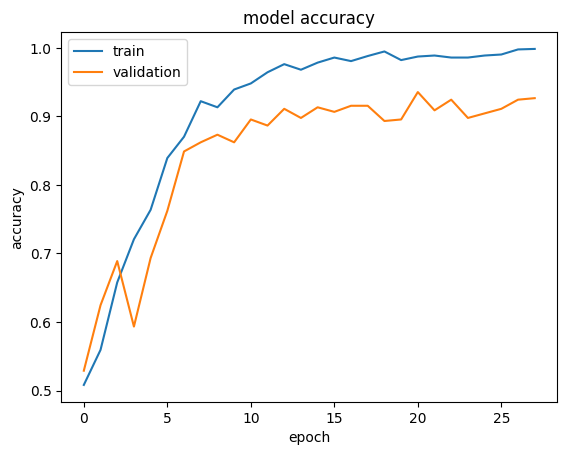

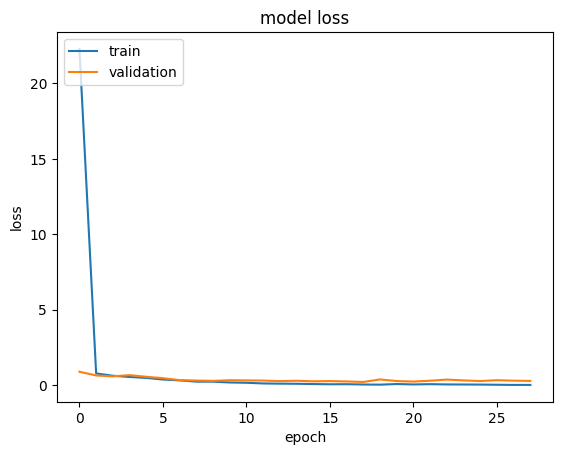

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

 # summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## With data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(50,50, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model22aug = Sequential([
    data_augmentation,
    Conv2D(16, (2, 2), activation='relu', padding= 'same', input_shape=(50, 50, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (2, 2), padding= 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64,(2, 2), padding= 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model22aug.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 50, 50, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 16)        208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)       

In [ ]:
# Compile the model
model22aug.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model22aug.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_val, y_val),callbacks = callbacks)

Epoch 1/50
27/27 [==============================] - 4s 151ms/step - loss: 0.2138 - accuracy: 0.9170 - val_loss: 0.1886 - val_accuracy: 0.9222
Epoch 2/50
27/27 [==============================] - 4s 133ms/step - loss: 0.1755 - accuracy: 0.9467 - val_loss: 0.1815 - val_accuracy: 0.9489
Epoch 3/50
27/27 [==============================] - 3s 127ms/step - loss: 0.1801 - accuracy: 0.9385 - val_loss: 0.1704 - val_accuracy: 0.9467
Epoch 4/50
27/27 [==============================] - 5s 202ms/step - loss: 0.1863 - accuracy: 0.9333 - val_loss: 0.1870 - val_accuracy: 0.9444
Epoch 5/50
27/27 [==============================] - 4s 161ms/step - loss: 0.1740 - accuracy: 0.9385 - val_loss: 0.2328 - val_accuracy: 0.9356
Epoch 6/50
27/27 [==============================] - 4s 131ms/step - loss: 0.1724 - accuracy: 0.9378 - val_loss: 0.1574 - val_accuracy: 0.9467
Epoch 7/50
27/27 [==============================] - 4s 140ms/step - loss: 0.1284 - accuracy: 0.9541 - val_loss: 0.1919 - val_accuracy: 0.9511
Epoch 

In [ ]:
# evaluate and print test accuracy
score = model22aug.evaluate(X_test, y_test)
print('\n', 'Test accuracy:', score[1] ,'\n')

19/19 [==============================] - 0s 20ms/step - loss: 0.1177 - accuracy: 0.9600

 Test accuracy: 0.9599999785423279 



In [ ]:
score

[0.11767107993364334, 0.9599999785423279]

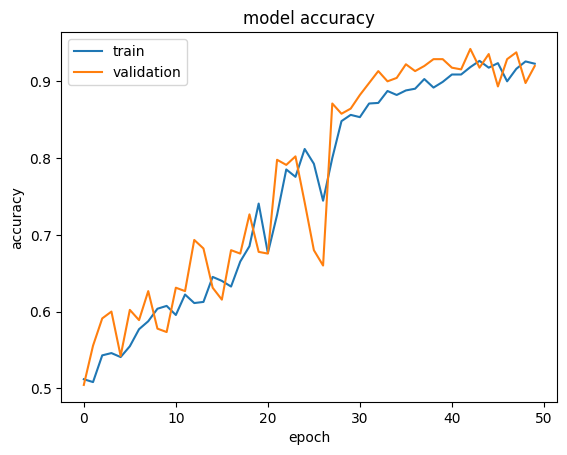

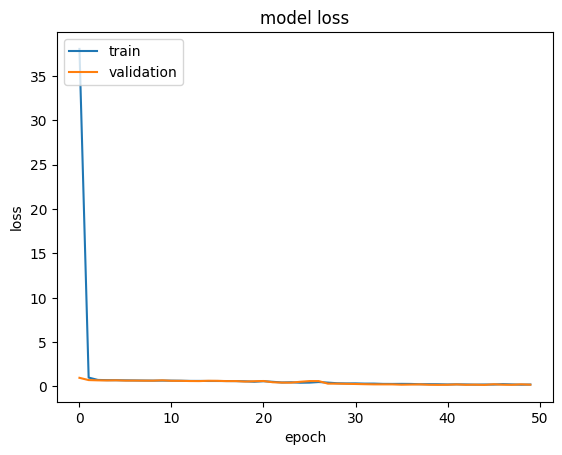

In [ ]:
# summarize history for accuracy

# plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

 # summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

19/19 [==============================] - 1s 21ms/step


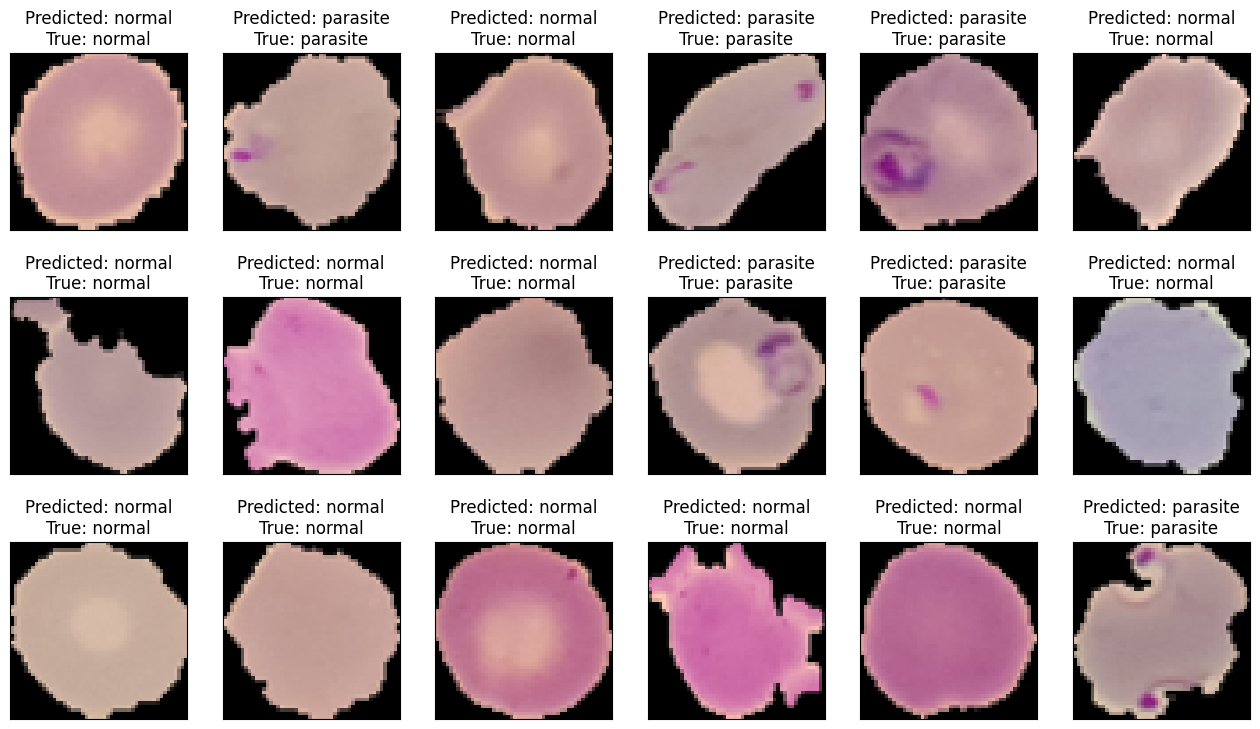

In [ ]:
# Get predicted labels for test set
y_pred = model.predict(X_test)

# Define a list of class names for reference
class_names = ['parasite', 'normal']

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=18, replace=False)):
#     print(i,idx)

    ax = fig.add_subplot(3, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_prob = y_pred[idx][0]
    pred_label = class_names[int(round(pred_prob))]
    true_label = class_names[int(y_test[idx])]
    ax.set_title("Predicted: {}\nTrue: {}".format(pred_label, true_label))

In [ ]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
threshold = 0.70
predictions_final = [int(pred>threshold) for pred in predictions]

print(classification_report(y_test, predictions_final))

19/19 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       303
           1       0.93      0.95      0.94       297

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



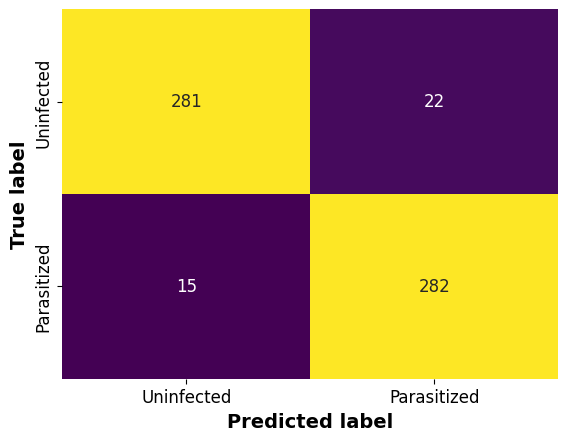

In [ ]:
def draw_confusion_matrix(conf_matx,classes):
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks+1/2, classes, fontsize=12)
    plt.yticks(tick_marks+1/2, classes, fontsize=12)
    plt.ylabel('True label', fontsize=14, weight='bold')
    plt.xlabel('Predicted label', fontsize=14, weight='bold')
    plt.show()

conf_matx = confusion_matrix(y_test, predictions_final)
draw_confusion_matrix(conf_matx,classes=['Uninfected', 'Parasitized'])

In [ ]:
model.save('/content/drive/MyDrive/malaria/cell_images/model.h5')

Saving C37BP2_thinF_IMG_20150620_132847a_cell_18.png to C37BP2_thinF_IMG_20150620_132847a_cell_18.png


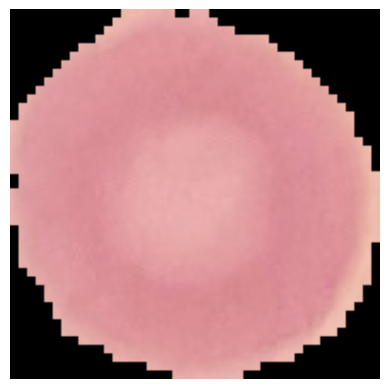

1/1 [==============================] - 0s 133ms/step
Predicted Class Label: Uninfected


In [ ]:
from keras.preprocessing import image
from google.colab import files

# Membaca gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = Image.open(new_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
img = img.resize((50, 50))  # Resize ke ukuran input model
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi dengan model yang sudah dilatih
predictions = model.predict(x)
predicted_class = "Uninfected" if predictions[0] > 0.5 else "Parasitized"

print("Predicted Class Label:", predicted_class)

Saving C48P9thinF_IMG_20150721_161412_cell_183.png to C48P9thinF_IMG_20150721_161412_cell_183.png


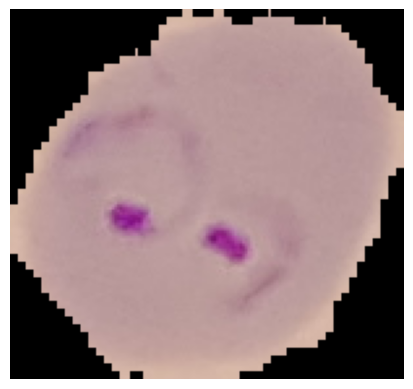

1/1 [==============================] - 0s 47ms/step
Predicted Class Label: Parasitized


In [ ]:
from keras.preprocessing import image
from google.colab import files
# Membaca gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = Image.open(new_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
img = img.resize((50, 50))  # Resize ke ukuran input model
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi dengan model yang sudah dilatih
predictions = model.predict(x)
predicted_class = "Uninfected" if predictions[0] > 0.5 else "Parasitized"

print("Predicted Class Label:", predicted_class)

Saving C48P9thinF_IMG_20150721_164129_cell_31.png to C48P9thinF_IMG_20150721_164129_cell_31.png


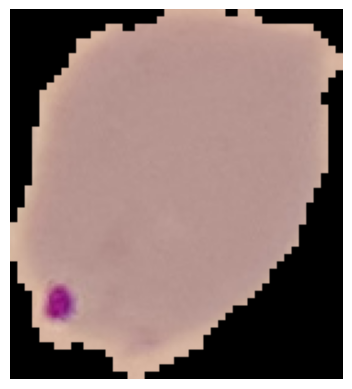

1/1 [==============================] - 0s 22ms/step
Predicted Class Label: Parasitized


In [ ]:
from keras.preprocessing import image
from google.colab import files
# Membaca gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = Image.open(new_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
img = img.resize((50, 50))  # Resize ke ukuran input model
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi dengan model yang sudah dilatih
predictions = model.predict(x)
predicted_class = "Uninfected" if predictions[0] > 0.5 else "Parasitized"

print("Predicted Class Label:", predicted_class)